In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [206]:
stock =pd.read_csv('.\stock.csv')

# Data Head,Shape,Features

In [207]:
stock.head()


,Date,Open,High,Low,Close,Volume,cat
0,26-05-2008,898.00,898.0,551.35,604.75,3972485,1
1,27-05-2008,624.70,639.0,580.30,593.15,1751063,1
2,28-05-2008,561.65,621.9,561.65,608.15,1652355,1
3,29-05-2008,619.40,619.4,576.00,599.45,669269,1
4,30-05-2008,605.40,607.0,538.00,571.70,1262117,1


In [208]:
print(stock.shape)
feature=['Open','High','Low','Close','Volume']
target=['Close']

(3202, 7)


In [209]:
stocck
stock.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
cat       False
dtype: bool

In [210]:
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
cat       0
dtype: int64

## Normalizing Dataset

In [149]:
scaler= MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.15907954],
       [0.09072036],
       [0.07494997],
       ...,
       [0.88745623],
       [0.92071036],
       [0.8861931 ]])

### Creating X-Train,Y-Train Structure

In [150]:
X_Train = []
Y_Train = []
for i in range (60,3202):
    X_Train.append(scaled_training_set[i-60:i,0])
    Y_Train.append(scaled_training_set[i, 0])
    
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(3142, 60)
(3142,)


In [151]:
X_Train = np.reshape(X_Train,(X_Train.shape[0],X_Train.shape[1],1))
X_Train.shape

(3142, 60, 1)

## Extracting the actual stock price 

In [152]:
dataset_test = pd.read_csv('stock.csv')
actual_stock_price = stock.iloc[:,1:2].values

In [153]:
#dataset_total = pd.concat((stock['Open'],dataset_test['Open']), axis = 0)
#inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

#inputs = inputs.reshape(-1,1)
#inputs = scaler.transform(inputs)

#X_test = []
#for i in range(60,80):
    #X_test.append(inputs[i-60:i,0])
#X_test = np.array(X_test)
#X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

## Scaling

In [185]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [157]:
#Plot the True Adj Close Value
stock['Close'].plot()

SyntaxError: invalid character in identifier (<ipython-input-157-01c222f92e96>, line 2)

In [159]:
stock=pd.read_csv('stock.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-05-26,898.00,898.0,551.35,604.75,3972485
2008-05-27,624.70,639.0,580.30,593.15,1751063
2008-05-28,561.65,621.9,561.65,608.15,1652355
2008-05-29,619.40,619.4,576.00,599.45,669269
2008-05-30,605.40,607.0,538.00,571.70,1262117


In [162]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', stock. shape)
print('Null Value Present: ', stock.isnull().values.any())


Dataframe Shape:  (3202, 5)
Null Value Present:  False


Text(0.5, 1.0, 'Closing value on the basis of year')

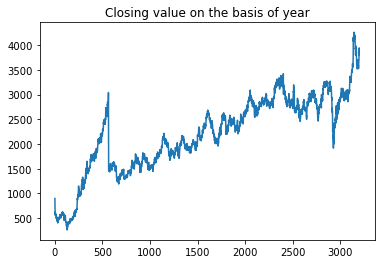

In [213]:
#Plot the True Adj Close Value
stock['Open'].plot()
plt.title('Closing value on the basis of year')

In [168]:
#Set Target Variable
output_var = pd.DataFrame(stock['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [169]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stock.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2008-05-26,0.159080,0.145757,0.073476,0.465007
2008-05-27,0.090720,0.081875,0.080828,0.204648
2008-05-28,0.074950,0.077657,0.076092,0.193080
2008-05-29,0.089395,0.077041,0.079736,0.077859
2008-05-30,0.085893,0.073982,0.070086,0.147342


In [171]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10).split(y)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


NameError: name 'TimeSeriesSplit' is not defined

In [143]:
y_prediction = regressor.predict(X_test)
print(y_prediction[:5])
print('*'*35)
print(y_test[:5])
#predicted_stock_price = regressor.predict(X_test)
#predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

ValueError: Found array with dim 3. Estimator expected <= 2.

## Chcking for any null value in the data set

In [77]:
stock.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [78]:
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [79]:
stock1 = pd.read_csv('.\stock.csv')
print('Column List : ',stock1.columns)
stock1.describe()

Column List :  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


,Open,High,Low,Close,Volume
count,3202.000000,3202.000000,3202.000000,3202.000000,3.202000e+03
mean,2191.537883,2219.934510,2162.215209,2190.412196,4.114639e+05
std,776.148452,781.289529,770.192017,775.095766,3.911067e+05
min,262.000000,307.050000,262.000000,301.900000,4.966000e+03
25%,1663.250000,1693.775000,1636.362500,1661.925000,2.054658e+05
50%,2270.000000,2305.575000,2240.250000,2270.225000,3.125365e+05
75%,2810.000000,2834.950000,2778.362500,2808.487500,5.000315e+05
max,4260.000000,4361.400000,4200.000000,4237.450000,8.537143e+06


In [80]:
stock1.head()

,Date,Open,High,Low,Close,Volume
0,26-05-2008,898.00,898.0,551.35,604.75,3972485
1,27-05-2008,624.70,639.0,580.30,593.15,1751063
2,28-05-2008,561.65,621.9,561.65,608.15,1652355
3,29-05-2008,619.40,619.4,576.00,599.45,669269
4,30-05-2008,605.40,607.0,538.00,571.70,1262117


In [81]:
stock1.tail()

,Date,Open,High,Low,Close,Volume
3197,26-04-2021,3682.20,3749.00,3676.0,3738.85,480016
3198,27-04-2021,3738.85,3798.00,3727.2,3785.50,518487
3199,28-04-2021,3810.05,3954.00,3807.0,3889.75,1252958
3200,29-04-2021,3943.00,3954.30,3807.1,3836.45,1335444
3201,30-04-2021,3805.00,3966.35,3800.0,3833.75,1340273


In [82]:
stock1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3202 non-null   object 
 1   Open    3202 non-null   float64
 2   High    3202 non-null   float64
 3   Low     3202 non-null   float64
 4   Close   3202 non-null   float64
 5   Volume  3202 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 150.2+ KB


In [100]:
stock1['Date']=pd.to_datetime(stock1.Date,format = "%d-%m-%y")
stock1.index=stock1['Date']
plt.figure(figsize=(20,5))
plt.plot(stock1['Close'],label='Close Price history')


ValueError: unconverted data remains: 08

              Open   High     Low   Close   Volume
Date                                              
2008-05-26  898.00  898.0  551.35  604.75  3972485
2008-05-27  624.70  639.0  580.30  593.15  1751063
2008-05-28  561.65  621.9  561.65  608.15  1652355
2008-05-29  619.40  619.4  576.00  599.45   669269
2008-05-30  605.40  607.0  538.00  571.70  1262117


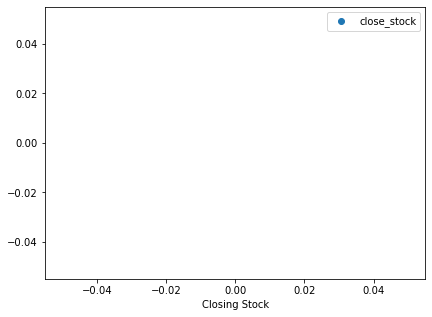

In [204]:
stock['Close'] = stock['Close'].astype('category')
print(stock.head())
close_stock = stock.loc[stock['Close'] == 'close_stock']
plt.figure(1,figsize=(15,5))

plt.subplot(121)
plt.plot(close_stock['Close'],np.zeros_like(close_stock['Close']),'o',label='close_stock')
plt.legend()
plt.xlabel('Closing Stock')
plt.show()

Text(0.5, 1.0, 'Volume of the Stock')

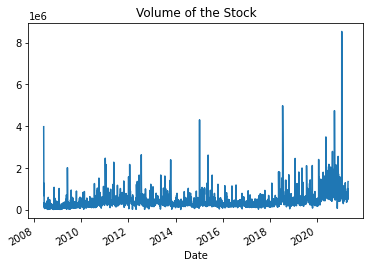

In [188]:
stock['Volume'].plot()
plt.title('Volume of the Stock')

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


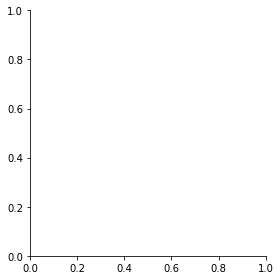

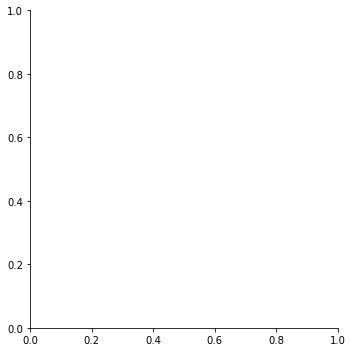

In [200]:
sns.FacetGrid(stock,hue='Close',height=4).map(sns.displot,'Volume').add_legend()
plt.title('Histogram on Top Speed')
plt.show()

TypeError: no numeric data to plot

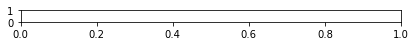

In [202]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)


plt.subplot(2, 2, 1)
stock['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Stock Volume")
    
plt.tight_layout()
